# Importing requried Libraries

In [5]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



# Taking url link from website

In [7]:
url = "https://www.carwale.com/used/cars-for-sale/#sc=-1&so=-1&car=7+16+8+10&city=105&pc=105&pn"

In [8]:
response = requests.get(url)

In [9]:
response.status_code

403

In [10]:
 page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})

In [11]:
page

<Response [200]>

In [12]:
soup = BeautifulSoup(page.text)

In [13]:
a = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")

# collecting the data  by using BeautifulSoup

In [24]:
model = []
company = []
km = []
price = []
fuel = []
city = []
EMIStarts = []
year= []


# Model
for i in range(1,14):
    url = (f"https://www.carwale.com/used/cars-for-sale/#sc=-1&so=-1&car=7+16+8+10&city=105&pc=105&pn=1")
    page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.text)
    a = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in a:
        text = i.text.strip()
        regex = re.findall("\W(\w+\D\w+).+",text)
        model.append(regex[0])

    # KiloMeter
    b = soup.find_all("span",class_="slkms")
    for i in b:
        text = i.text
        regex = re.findall("(\d+\W\d+).+",text)
        km.append(regex[0])
        
    # Fuel
    c = soup.find_all("span",class_="fuel")
    for i in c:
        text = i.text.rstrip("\xa0\xa0|\xa0\xa0")
        fuel.append(text)
        #if text:
         #   fuel.append(text)
        #else:
         #   fuel.append(np.nan)
        
    # price
    d = soup.find_all("span",class_="rupee-lac slprice")
    for i in d:
        text = i.text
        regex = re.findall("\s(\d+\W\d+)",text)
        if regex:
            price.append(regex[0])
        else:
            price.append(np.nan)
            
    # City
    e = soup.find_all("div",class_="card-detail-block")
    for i in e:
        b=i.find("span",class_="cityName")
        if b:
            city.append(b.text)
        else:
            city.append(np.nan)
        
        
    # EMIStarts 
    f = soup.find_all("div",class_="card-detail-block")
    for i in f:
        a=i.find("button",class_="card-detail__emi-link text-link")
        if a:
            EMIStarts.append(a.text)
        else:
            EMIStarts.append(np.nan)
    # Year
    g = soup.find_all("span",class_="slYear card-detail-block__title-text-with-year")
    for i in g:
        year.append(i.text.strip())
        
        
    # company 
    h = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in h:
        text = i.text
        regex = re.findall("\W(\w+\w).+",text)
        company.append(regex[0])

In [25]:
len(company)


384

In [16]:
len(model)

415

In [17]:
len(year)

415

In [18]:
len(fuel)

415

In [19]:
len(price)

415

In [20]:
len(km)

415

In [21]:
len(city)

415

In [22]:
len(EMIStarts)

415

In [23]:
len(year)

415

In [26]:
 d = {"Comapny":company,
       "Model":model,
       "Year": year,
       "Price":price,
       "Kilometers":km,
       "Fuel":fuel,
       "City":city,
       "EMIStarts":EMIStarts,
       
    
}

# Creating DataFrame Using Pandas

In [27]:
df = pd.DataFrame(d)

# DataFrame To Csv file

In [28]:
df.to_csv(r"CARWALE  Data.csv")

In [7]:
Carwale = pd.read_csv(r"C:\\Users\\Shivani\\Downloads\\car_data.csv")

In [8]:
Carwale

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,"₹72,654"
1,1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,"₹10,628"
2,2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,"₹12,870"
3,3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,"₹9,631"
4,4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,"₹19,097"
...,...,...,...,...,...,...,...,...,...
409,409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,"₹9,133"
410,410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,"₹14,447"
411,411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,"₹9,631"
412,412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,"₹6,393"


In [9]:
Carwale.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,"₹72,654"
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,"₹10,628"
2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,"₹12,870"
3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,"₹9,631"
4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,"₹19,097"
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,"₹9,133"
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,"₹14,447"
411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,"₹9,631"
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,"₹6,393"


In [10]:
Carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    414 non-null    int64  
 1   Company       414 non-null    object 
 2   Model         414 non-null    object 
 3   Year          414 non-null    int64  
 4   Price in Lak  361 non-null    float64
 5   Fuel          414 non-null    object 
 6   Kilometer     414 non-null    object 
 7   City          414 non-null    object 
 8   EMIstarts     362 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.2+ KB


In [11]:
Carwale.isnull().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Price in Lak    53
Fuel             0
Kilometer        0
City             0
EMIstarts       52
dtype: int64

# Data Cleaning

In [67]:
Carwale["EMIstarts"]=Carwale["EMIstarts"].apply(lambda x:str(x).replace("₹",""))

In [68]:
Carwale["EMIstarts"]=Carwale["EMIstarts"].apply(lambda x:str(x).replace(",",""))

In [69]:
Carwale

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,72654
1,1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,10628
2,2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,12870
3,3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,9631
4,4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,19097
...,...,...,...,...,...,...,...,...,...
409,409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,9133
410,410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,14447
411,411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,9631
412,412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,6393


In [70]:
Carwale["Kilometer"]=Carwale["Kilometer"].apply(lambda x:str(x).replace(",",""))

In [71]:
Carwale.dtypes

Unnamed: 0        int64
Company          object
Model            object
Year              int64
Price in Lak    float64
Fuel             object
Kilometer        object
City             object
EMIstarts        object
dtype: object

In [72]:

Carwale["EMIstarts"]=Carwale["EMIstarts"].apply(lambda x:str(x).replace("1.31 L","131000"))

In [73]:
Carwale["EMIstarts"]=Carwale["EMIstarts"].apply(lambda x:str(x).replace("1.83 L","183000"))

In [74]:
Carwale.isna().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Price in Lak    53
Fuel             0
Kilometer        0
City             0
EMIstarts        0
dtype: int64

In [43]:
 Carwale.dtypes

Unnamed: 0        int64
Company          object
Model            object
Year              int64
Price in Lak    float64
Fuel             object
Kilometer        object
City             object
EMIstarts        object
dtype: object

In [44]:
Carwale["Kilometer"]=Carwale["Kilometer"].astype("int")

In [45]:
Carwale['EMIstarts']=Carwale['EMIstarts'].astype('float')

In [46]:
Carwale

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,BMW,3 Series,2020,43.75,Diesel,9300,Delhi,72654.0
1,1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628.0
2,2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870.0
3,3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631.0
4,4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097.0
...,...,...,...,...,...,...,...,...,...
409,409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133.0
410,410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447.0
411,411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631.0
412,412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393.0


In [47]:
Carwale['EMIstarts'].replace("a",np.nan,inplace=True)

In [48]:
Carwale['EMIstarts'].unique()

array([ 72654.,  10628.,  12870.,   9631.,  19097.,  17686.,     nan,
         7888.,   7057.,   9133.,   8718.,   6227.,  69748.,  13119.,
        11458.,   9880.,   4400.,   9598.,  10927.,  64766.,  15278.,
        19761.,  14447.,   9465.,  12455.,   6393.,   6559.,  11209.,
        27816.,   8801.,  10445.,  38195.,   6891.,  10379.,  17852.,
        22419.,  70578.,  13700.,   8054.,   5812.,  57957.,  12039.,
        10794.,  56047.,  73044.,  11126., 131000.,  64600.,   9797.,
         7306.,   7473.,   8303.,  36534., 183000.,   7622.,   8220.,
        10296.,   9714.,  26985.,  41516.,  26487.,  51480.,  31552.,
        78051.,  11043.,   9548.,  14032.,  12604.,  12438.,  11608.,
        17420.,  13268.,   9930.,  27484.,   7954.,  39839.,  79712.,
        22834.,  18018.,   8286.,  41101.,   9648.,  29061.,  46498.,
        30722.,  11624.,  82203.,   5729.,   9050.,  40686.,  13285.,
         9964.,   9117.,  25740.])

# Checking Nan values

In [60]:
Carwale.isna().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Price in Lak    53
Fuel             0
Kilometer        0
City             0
EMIstarts       52
dtype: int64

# Filling Nan values

In [75]:
Carwale['Price in Lak']=Carwale['Price in Lak'].fillna(Carwale['Price in Lak'].median())

In [76]:
Carwale['EMIstarts']=Carwale['EMIstarts'].fillna(Carwale['EMIstarts'].median())

# changing dtypes


In [ ]:
Carwale['EMIstarts']=Carwale['EMIstarts'].astype('float')

In [ ]:
Carwale["Kilometer"]=Carwale["Kilometer"].astype("int")

In [52]:
Carwale.dtypes

Unnamed: 0        int64
Company          object
Model            object
Year              int64
Price in Lak    float64
Fuel             object
Kilometer         int32
City             object
EMIstarts       float64
dtype: object

# Checking Outliers

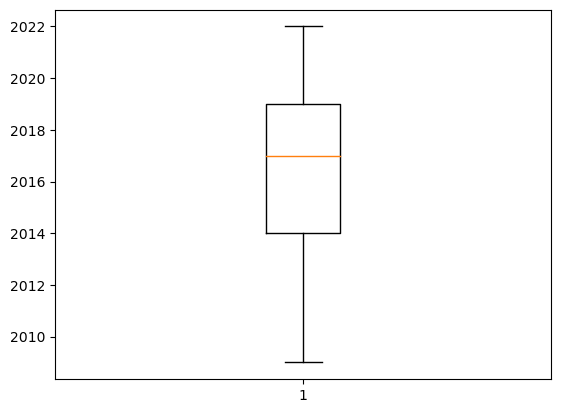

In [275]:
plt.boxplot(Carwale["Year"])
plt.show()

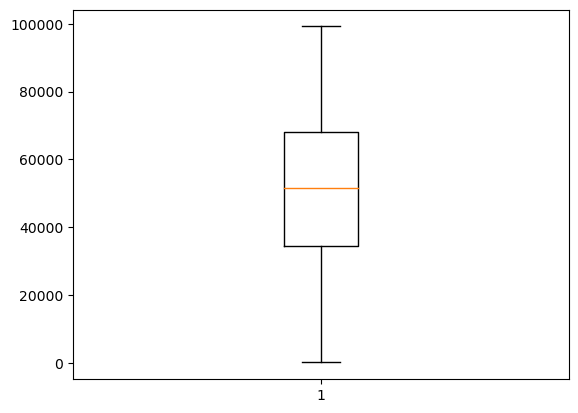

In [276]:
plt.boxplot(Carwale["Kilometer"])
plt.show()

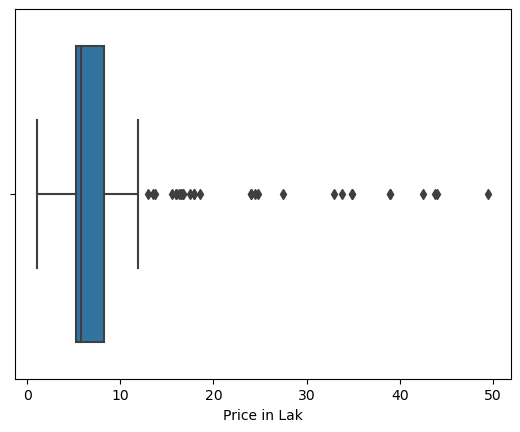

In [278]:
sns.boxplot(Carwale["Price in Lak"])
plt.show()

In [281]:
Carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    414 non-null    int64  
 1   Company       414 non-null    object 
 2   Model         414 non-null    object 
 3   Year          414 non-null    int64  
 4   Price in Lak  414 non-null    float64
 5   Fuel          414 non-null    object 
 6   Kilometer     414 non-null    int32  
 7   City          414 non-null    object 
 8   EMIstarts     414 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 27.6+ KB


In [161]:
num=Carwale.select_dtypes(include='number')

In [ ]:
#

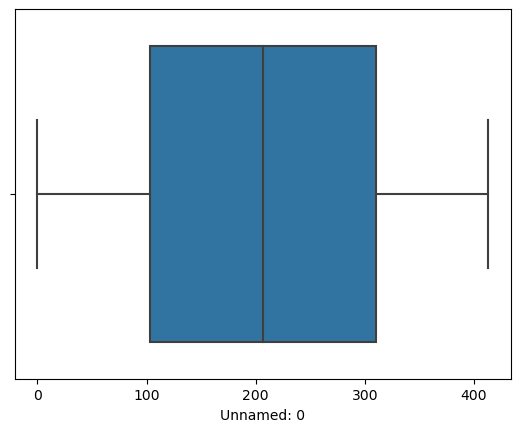

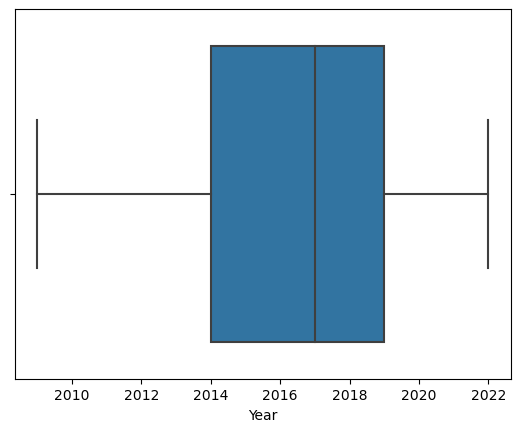

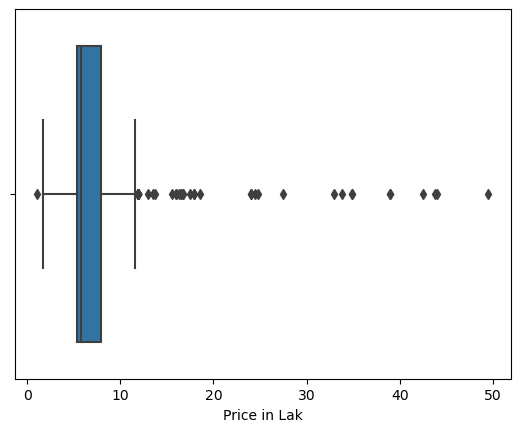

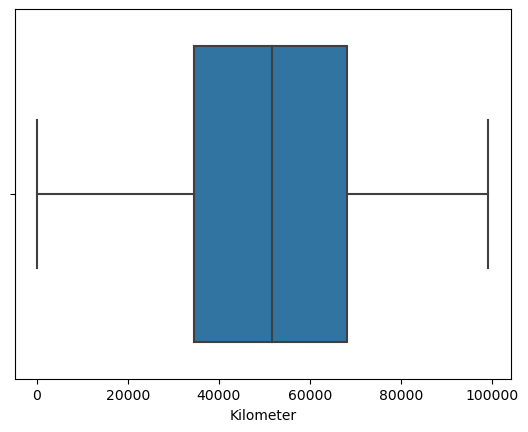

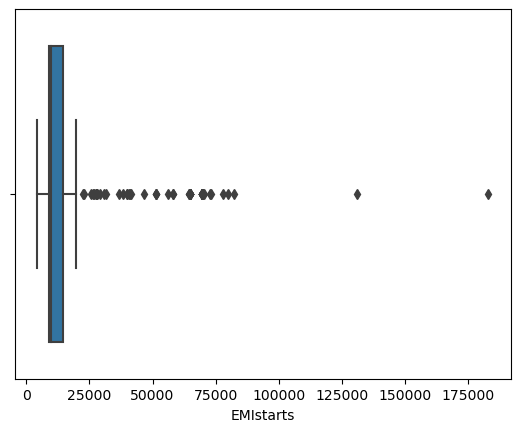

In [162]:
for i in num:
    sns.boxplot(Carwale[i])
    plt.show()

Inshights :- any value which is lesser than lower limit and any value greater than upper is called outliers.
From price  column outlier are 10 - 50(lakhs) these are upper limit outliers.
From price  column outlier are 0 - 5(lakhs) these are lower limit outliers.

In above box plot there is no outliers in kilometers.

In above box plot there is no outliers in Year.

Insights:
any value which is lesser than lower limit and any value greater than upper is called outliers.
From EMIs  column outlier are 25000 - 175000 these are upper limit outliers.
From EMIs  column there no outliers.

# Data Visualization

# univariant analysis

In [284]:
Carwale.drop("Unnamed: 0",axis =1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,9300,Delhi,72654.0
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628.0
2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870.0
3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631.0
4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097.0
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133.0
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447.0
411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631.0
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393.0


In [285]:
Carwale["Model"].nunique()

80

In [286]:
Carwale["Fuel"].nunique()

5

In [287]:
Carwale["Fuel"].value_counts()

Petrol        257
Diesel        127
CNG            28
Petrol + 1      1
Electric        1
Name: Fuel, dtype: int64

## Categorical

In [288]:
Carwale["Fuel"].unique()

array(['Diesel', 'Petrol', 'CNG', 'Petrol + 1', 'Electric'], dtype=object)

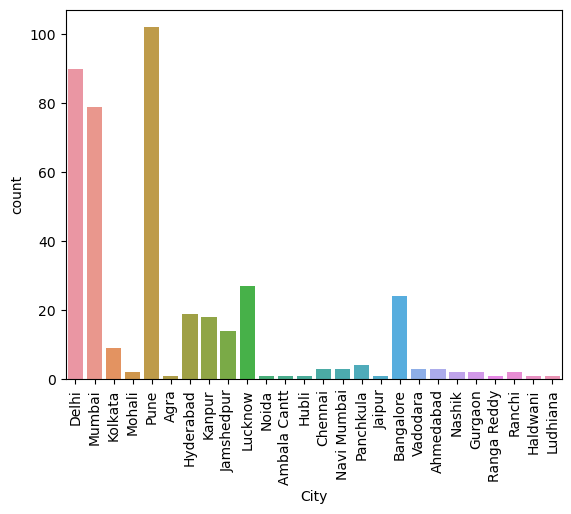

In [289]:
sns.countplot(Carwale["City"])
plt.xticks(rotation =90);
plt.show() 

Insights:
From above the countplot graph pune city has highest car sales compared to all other cities.
Delhi city has second highest car sales compared to all other cities.
Agra,Noida,Jaipur,Rangareddy,,Haldwani,Ludhiana these cities are low sales compared to other cities.

<AxesSubplot:xlabel='Fuel', ylabel='count'>

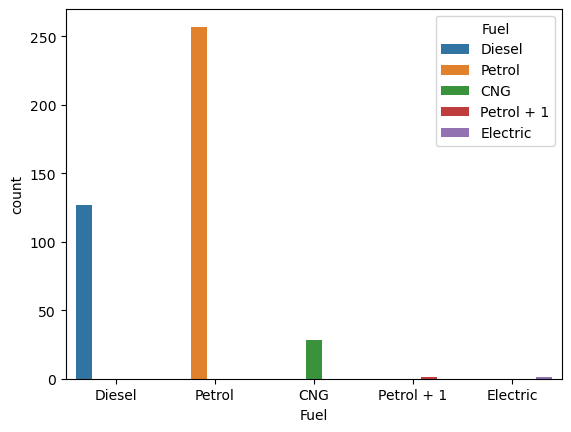

In [290]:
sns.countplot(Carwale["Fuel"],hue=Carwale["Fuel"])

Insights:
From the above countplot graph petrol fuel is using highly compared to all another fuels like diesel ,CNG,Petrol+1,Electric.
Electric Fuel and petrol Fuel is using less in number compared to another fuels.


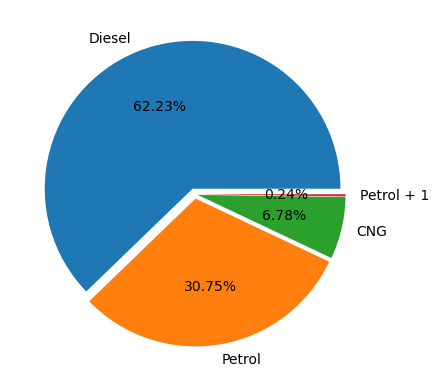

In [342]:
plt.pie(Carwale["Fuel"].value_counts()[:4],explode=[0.04,0.03,0.02,0.02],autopct ="%0.2F%%",labels = Carwale["Fuel"].unique()[:4])
plt.show()

Insights:
from the above piegraph shows the percentage of all Fuels. 
Diesel Fuel has used highly 62.23% compared to all other Fuels.
petrol Fuel has used less 0.24%  compared to all other Fuels.


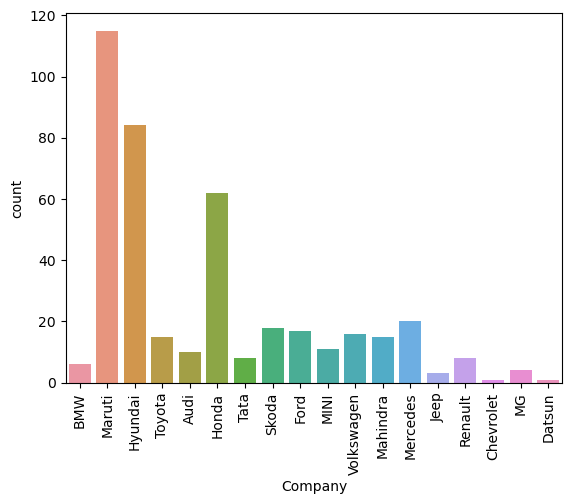

In [292]:
sns.countplot(x = Carwale["Company"])
plt.xticks(rotation =90);
plt.show()                        

Insights:
From above countplot there are 18 car companys  Maruthi cars are sales more in number comparing to all other company cars.
chevrolert and Datsum Company cars are sales in less number.
by analyzing the graph we can conclude that Maruthi  cars are leading in market.


## Numerical

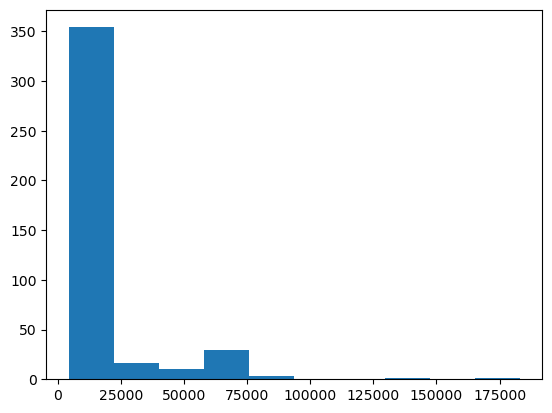

In [293]:
plt.hist(Carwale["EMIstarts"])
plt.show()

Insights:
From histogram graph 0-25000 EMIs has more payments compares to all other EMIs.
125000 - 1750000 has very low EMIs.
100000 - 125000 it has no EMIs . 

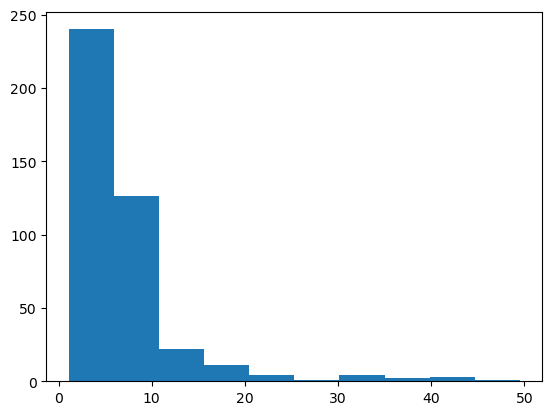

In [294]:
plt.hist(Carwale["Price in Lak"])
plt.show()

Insights:
From  above histogram graph 0-5lakhs has  more car  sales.
for 50 lakhs there less sales.

In [316]:
Carwale['Year']=Carwale['Year'].astype("int")

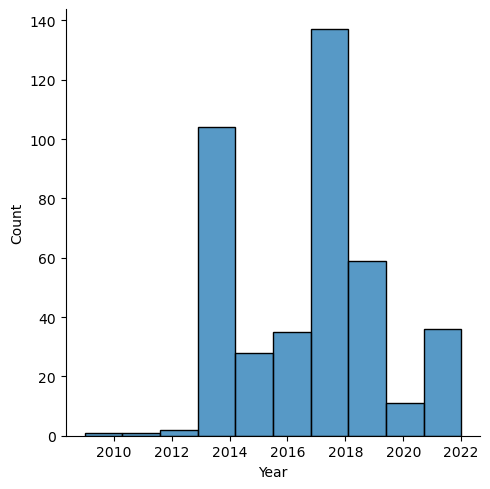

In [322]:
sns.displot(Carwale["Year"],kind='hist')
plt.show()

In [ ]:
# from graph distplot  cars sales

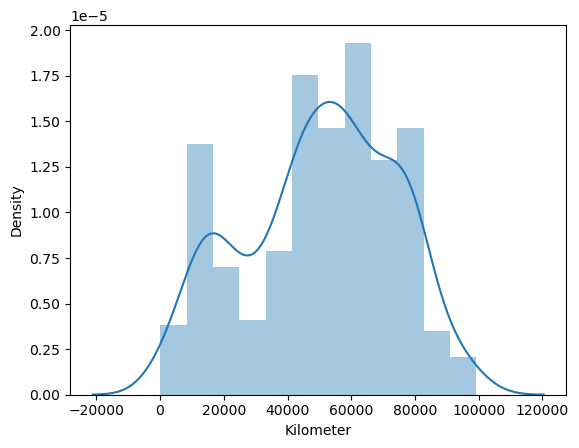

In [311]:
sns.distplot(Carwale["Kilometer"])
plt.show()

In [297]:
Carwale.columns

Index(['Unnamed: 0', 'Company', 'Model', 'Year', 'Price in Lak', 'Fuel',
       'Kilometer', 'City', 'EMIstarts'],
      dtype='object')

#  Bivariant Analysis

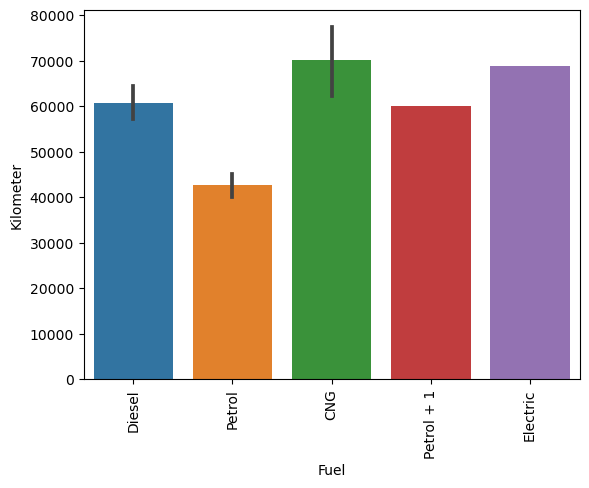

In [323]:
sns.barplot( x = Carwale["Fuel"] ,y = Carwale["Kilometer"])
plt.xticks(rotation =90);

Insights:
From the above barplot we can analyse  CNG fuel has travelled more kilometers compared to other fuels.
petrol fuel is travelled less kilometers compared to all fuels.


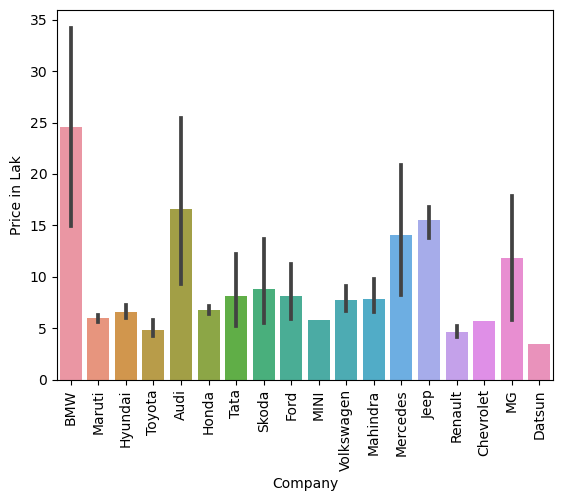

In [324]:
sns.barplot( x = Carwale["Company"],y = Carwale["Price in Lak"])
plt.xticks(rotation =90);

Insights:
From above graph it represent  BMW car has more price(lakhs) compared to  all other cars.
Datsun car has less price(lakhs) compared to all other cars.

# multi variant Analysis

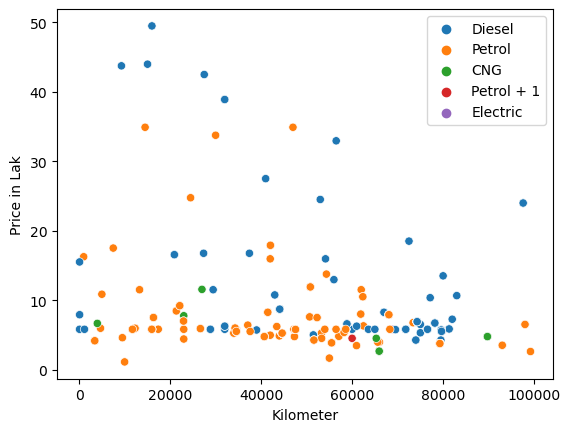

In [331]:
sns.scatterplot(Carwale["Kilometer"],Carwale["Price in Lak"],hue=Carwale["Fuel"]);
plt.legend(bbox_to_anchor=(1,1))

Insights:
From above graph 0 -10 (lakhs) car has travelled more 0-60000kms using petrol fuel highly.
From  above graph 0 -10 (lakhs) car has travelled more 60000-80000kms using Diesel fuel highly.
From above graph 0 -10 (lakhs) car has travelled more 0-100000kms using CNG fuel less.




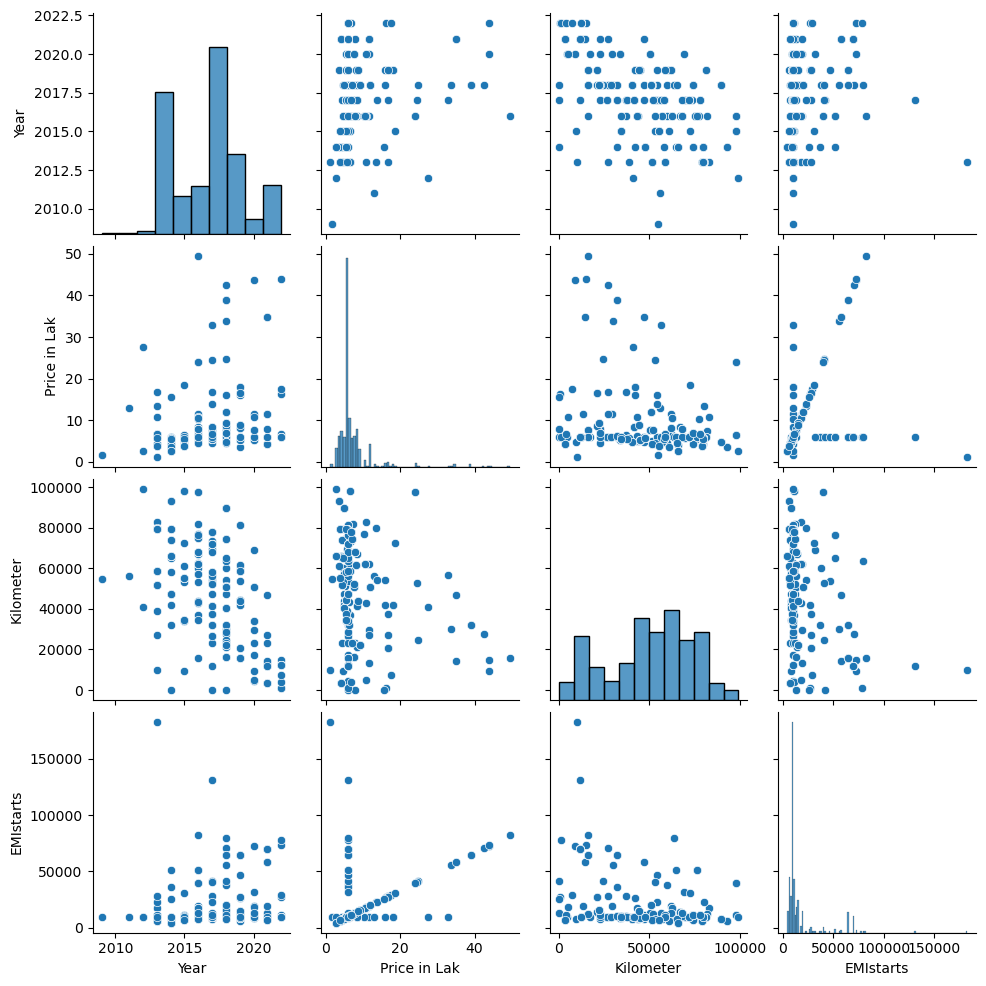

In [338]:
sns.pairplot(Carwale)

<AxesSubplot:>

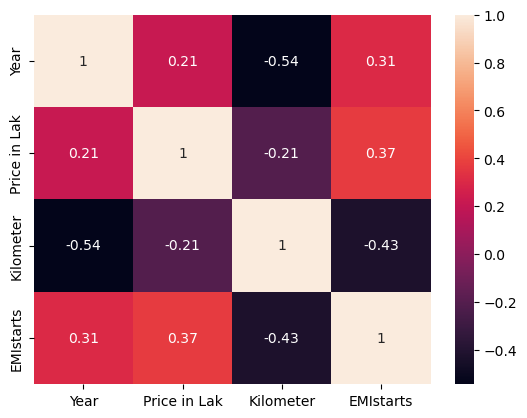

In [336]:
sns.heatmap(Carwale.corr(),annot=True)

Insights:
From anbove Heat map EMIstarts and price in Lakh has positive correlation.
kilometerand and year has Negative correlation.